In [1]:
!pip install -U finance-datareader

In [54]:
import FinanceDataReader as fdr

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

In [55]:
df_krx = fdr.StockListing('KRX')

In [56]:
df_krx[df_krx['Name'].str.contains('삼일')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3864,032280,KOSDAQ,삼일,도로 화물 운송업,운송 및 하역수입,1997-03-15,12월,"강승엽,안인수(각자대표)",http://www.samil31.co.kr,경상북도
3865,002290,KOSDAQ,삼일기업공사,건물 건설업,도급공사,1992-11-30,12월,박종웅,http://www.samilenter.com,서울특별시
3866,004440,KOSPI,삼일씨엔에스,"시멘트, 석회, 플라스터 및 그 제품 제조업","PHC파일, 골재, 강교제작",2016-03-30,12월,강흥구,http://www.esamilcns.com,서울특별시
3867,000520,KOSPI,삼일제약,의약품 제조업,"양약(부루펜,액티피드,포리부틴) 제조,도매",1985-05-29,12월,"허승범, 김상진 (각자 대표이사)",http://www.samil-pharm.com,서울특별시


In [57]:
samil = fdr.DataReader(symbol='032280', start='2000-01-01')
samil = samil.reset_index()
samil

,Date,Open,High,Low,Close,Volume,Change
0,2000-01-04,2500,2800,2500,2800,20,0.120000
1,2000-01-05,2500,3130,2500,2500,2660,-0.107143
2,2000-01-06,2220,2780,2220,2560,205,0.024000
3,2000-01-07,2600,2600,2600,2600,1000,0.015625
4,2000-01-10,2600,2600,2600,2600,500,0.000000
...,...,...,...,...,...,...,...
5624,2022-10-17,1855,1925,1855,1895,54879,0.021563
5625,2022-10-18,1915,1960,1915,1955,57877,0.031662
5626,2022-10-19,1960,2000,1945,1965,46040,0.005115
5627,2022-10-20,1960,2010,1935,1935,51227,-0.015267


In [26]:
# 월별 날짜로 만들기

def to_month(data):
    data['month'] = data['Date']
    
    for i in range(len(data)):
        year = str(data.Date[i].year)
        month = str(data.Date[i].month)
        date = year + '-' + month
        data['month'][i] = datetime.strptime(str(date), '%Y-%m').date()
        
    data = data.drop(columns=['Date','Open','High','Low','Volume'])
    
    # df column 위치 조절
    data = data[['month','Close','Change']]
    data = data.groupby('month').mean()
    
    data = data.reset_index()
    
    # month column으로 만들기
    for j in range(len(data)):
        data.month = data.month.astype(str)
        data.month[j] = data.month[j][:7]

    return data

In [27]:
samil = to_month(samil)
samil

,month,Close,Change
0,2000-01,2616.500000,0.002182
1,2000-02,2468.000000,0.005569
2,2000-03,3760.000000,0.034222
3,2000-04,3969.444444,-0.008564
4,2000-05,3352.500000,-0.008000
...,...,...,...
269,2022-06,2370.250000,-0.012257
270,2022-07,2181.666667,0.006411
271,2022-08,2353.409091,-0.001043
272,2022-09,2096.500000,-0.009542


In [28]:
samil_scaled = samil.set_index('month')

scaler = MinMaxScaler()
fitted = scaler.fit(samil_scaled)
samil_scaled = scaler.transform(samil_scaled)

samil_scaled = pd.DataFrame(samil_scaled, columns=['Close', 'Change'])
samil_scaled.insert(0, 'month', samil['month'])

In [29]:
samil_scaled

,month,Close,Change
0,2000-01,0.166849,0.466341
1,2000-02,0.151669,0.509320
2,2000-03,0.283741,0.872881
3,2000-04,0.305151,0.329995
4,2000-05,0.242085,0.337147
...,...,...,...
269,2022-06,0.141677,0.283132
270,2022-07,0.122400,0.520008
271,2022-08,0.139956,0.425427
272,2022-09,0.113694,0.317581


In [58]:
# kospi = fdr.DataReader('KS11', '2000')
# kospi = kospi.reset_index()
# kospi

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [33]:
kospi = pd.read_csv('data/CJ.csv')
kospi = kospi.iloc[:, 1:4]
kospi

,Date,Kospi_Close,Kospi_Change
0,2000-01-04,0.195293,0.0301
1,2000-01-05,0.183802,-0.0687
2,2000-01-06,0.173015,-0.0259
3,2000-01-07,0.165013,-0.0126
4,2000-01-10,0.177083,0.0407
...,...,...,...
5619,2022-10-13,0.600067,-0.0180
5620,2022-10-14,0.610929,0.0230
5621,2022-10-17,0.605290,0.0032
5622,2022-10-18,0.620492,0.0136


In [34]:
# 월별 날짜로 만들기

def to_month_kospi(data):
    data['month'] = data['Date']
    
    for i in range(len(data)):
        data['Date'][i] = datetime.strptime(kospi.Date[i], '%Y-%m-%d')
        year = str(data.Date[i].year)
        month = str(data.Date[i].month)
        date = year + '-' + month
        data['month'][i] = datetime.strptime(str(date), '%Y-%m').date()
        
#     data = data.drop(columns=['Date','Open','High','Low','Volume'])
    
    # df column 위치 조절
    data = data[['month','Kospi_Close','Kospi_Change']]
    data = data.groupby('month').mean()
    
    data = data.reset_index()
    
    # month column으로 만들기
    for j in range(len(data)):
        data.month = data.month.astype(str)
        data.month[j] = data.month[j][:7]

    return data

In [35]:
kospi = to_month_kospi(kospi)
kospi

,month,Kospi_Close,Kospi_Change
0,2000-01,0.166989,-0.003865
1,2000-02,0.150465,-0.006220
2,2000-03,0.141921,0.002064
3,2000-04,0.107834,-0.008667
4,2000-05,0.086009,0.000940
...,...,...,...
269,2022-06,0.704787,-0.006930
270,2022-07,0.665200,0.002419
271,2022-08,0.707168,0.000423
272,2022-09,0.656375,-0.006745


<AxesSubplot:>

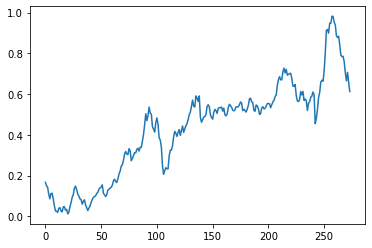

In [36]:
kospi['Kospi_Close'].plot()

In [17]:
a = 100
samil_scaled_ = samil_scaled[:a]
kospi_ = kospi[:a]

In [37]:
df = pd.merge(samil_scaled, kospi, on='month', how='left')
# df = df.drop(['Open_x','High_x','Low_x','Close_x','Close_y','Volume_x','Open_y','High_y','Low_y','Volume_y'], axis=1)
df.rename(columns={'Close':'Samil_Close', 'Change':'Samil_Change'},inplace=True)
df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change
0,2000-01,0.166849,0.466341,0.166989,-0.003865
1,2000-02,0.151669,0.509320,0.150465,-0.006220
2,2000-03,0.283741,0.872881,0.141921,0.002064
3,2000-04,0.305151,0.329995,0.107834,-0.008667
4,2000-05,0.242085,0.337147,0.086009,0.000940
...,...,...,...,...,...
269,2022-06,0.141677,0.283132,0.704787,-0.006930
270,2022-07,0.122400,0.520008,0.665200,0.002419
271,2022-08,0.139956,0.425427,0.707168,0.000423
272,2022-09,0.113694,0.317581,0.656375,-0.006745


## 월 기준으로 하락세 뽑아보기

In [38]:
# a의 변동률

def RatioMean(a):
    result = []

    for i in range(len(a)-1):
        K = a.Kospi_Close[i+1] - a.Kospi_Close[i] 
        D = a.Samil_Close[i+1] - a.Samil_Close[i] 
        
    # 하락 트리거만 잡기 위해 -1 외에 모두 1로 정의
#         if i+1 == len(a):
#             result.append(np.nan)
        if (K < 0) & (D < 0):   # a일수간의 변동평균이 둘 다 - 일 때
            if K > D:
                result.append(1)
            elif K < D:           # kospi 변동률보다 덜 변동
                result.append(0)
        elif (K > 0) & (D > 0):   # a일수간의 변동평균이 둘 다 + 일 때
            if K > D:
                result.append(1)
            if K < D:             # 둘 다 + 이지만, kospi 변동률보다 적게 상승
                result.append(0)
        elif (K >= 0) & (D <= 0): # K 변동 평균은 양수지만 D 변동 평균이 음수일 때
            result.append(1)
        elif (K <= 0) & (D >= 0): # K 변동 평균은 음수지만 D 변동 평균이 양수일 때
            result.append(0)

    return result

In [39]:
Ratio_list = RatioMean(df)
Ratio_list

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [40]:
len(Ratio_list)

273

In [41]:
LowerThanKospi_1m = pd.DataFrame(Ratio_list,columns=['label'])
# LowerThanKospi_3m.Ratio_list = LowerThanKospi_3m['Ratio_list'] < 0
# LowerThanKospi_3m = LowerThanKospi_3m.fillna(0)

In [42]:
LowerThanKospi_1m.value_counts()

label
1        160
0        113
dtype: int64

In [49]:
df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change
0,2000-01,0.166849,0.466341,0.166989,-0.003865
1,2000-02,0.151669,0.509320,0.150465,-0.006220
2,2000-03,0.283741,0.872881,0.141921,0.002064
3,2000-04,0.305151,0.329995,0.107834,-0.008667
4,2000-05,0.242085,0.337147,0.086009,0.000940
...,...,...,...,...,...
269,2022-06,0.141677,0.283132,0.704787,-0.006930
270,2022-07,0.122400,0.520008,0.665200,0.002419
271,2022-08,0.139956,0.425427,0.707168,0.000423
272,2022-09,0.113694,0.317581,0.656375,-0.006745


In [50]:
LowerThanKospi_1m_label = pd.concat([df, LowerThanKospi_1m], axis=1)
LowerThanKospi_1m_label = LowerThanKospi_1m_label.fillna(0)

In [52]:
LowerThanKospi_1m_label.label = LowerThanKospi_1m_label.label.astype(int)
LowerThanKospi_1m_label

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0
2,2000-03,0.283741,0.872881,0.141921,0.002064,0
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1
4,2000-05,0.242085,0.337147,0.086009,0.000940,1
...,...,...,...,...,...,...
269,2022-06,0.141677,0.283132,0.704787,-0.006930,0
270,2022-07,0.122400,0.520008,0.665200,0.002419,1
271,2022-08,0.139956,0.425427,0.707168,0.000423,0
272,2022-09,0.113694,0.317581,0.656375,-0.006745,0


In [53]:
LowerThanKospi_1m_label.to_csv('Samil_label.csv')

In [ ]:
'''
# 하락 여부 label

label = []
for row in LowerThanKospi_3m.LowerThanKospi_3m:
    if row < 0:
        label.append(-1)
    elif row > 0:
        label.append(1)
    else:
        label.append(0)
    
LowerThanKospi_3m['label'] = label
LowerThanKospi_3m
'''

In [224]:
LowerThanKospi_1m_label.label.isnull().sum()

0

In [225]:
LowerThanKospi_1m_label.label.value_counts()

1.0    160
0.0    114
Name: label, dtype: int64

In [240]:
# LowerThanKospi_1m_label.label = LowerThanKospi_3m_label.label.replace(0, 1)
LowerThanKospi_1m_label.label = LowerThanKospi_1m_label.label.replace(-0.2, 1)
LowerThanKospi_1m_label

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0
...,...,...,...,...,...,...
269,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0
270,2022-07,0.122400,0.520008,0.665200,0.002419,1.0
271,2022-08,0.139956,0.425427,0.707168,0.000423,0.0
272,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0


## 시각적으로 확인하기 위해 종가를 scaling 후 비교

In [245]:
a = 90
LowerThanKospi_1m_label_ = LowerThanKospi_1m_label[a:]
# samil_scaled_ = samil_scaled[:a]
# kospi_scaled_ = kospi_scaled[:a]

In [21]:
LowerThanKospi_1m_label_

NameError: name 'LowerThanKospi_1m_label_' is not defined

In [20]:
# 주가 데이터 그래프

data1 = LowerThanKospi_1m_label_

plt.figure(figsize=(20, 10))
plt.rcParams['font.family'] = 'NanumGothic'

# plt.subplot(2, 1, 1)
# plt.axhline(y=0, color='black', linewidth=1)
ax = sns.lineplot(data=data1, x="month", y='Samil_Close', label='samil_price', color='brown')
ax = sns.lineplot(data=data1, x="month", y='Kospi_Close', label='kospi_price', color='blue')
ax = sns.scatterplot(data=data1, x="month", y="label", label='↓', color='black')

'''
plt.subplot(2, 1, 1)
plt.figure(figsize=(20, 10))
plt.axhline(y=0, color='r', linewidth=1)
sns.lineplot(data=data3, x="Date", y='Kospi_Change', label='kospi_change', color='orange')
sns.lineplot(data=data3, x='Date', y='CJ_Change', label='cj_change', color='skyBlue')
'''

total_len = len(data1.index)
ax.set_xticks(np.arange(0, total_len + 1, 15))

plt.show()


'''
# 주가 데이터 그래프

data1 = samil_scaled_
data2 = kospi_
# data3 = LowerThanKospi_3m_label_

plt.figure(figsize=(20, 10))
plt.rcParams['font.family'] = 'NanumGothic'

# plt.subplot(2, 1, 1)
plt.axhline(y=0, color='black', linewidth=1)
ax = sns.lineplot(data=data1, x="month", y='Close', label='samil_price', color='brown')
ax = sns.lineplot(data=data2, x="month", y='Kospi_Close', label='kospi_price', color='blue')
# ax = sns.scatterplot(data=data3, x="Date", y="label", label='↓', color='black')

total_len = len(data1.index)
ax.set_xticks(np.arange(0, total_len + 1, 10))

plt.subplot(2, 1, 1)
plt.figure(figsize=(20, 10))
plt.axhline(y=0, color='r', linewidth=1)
sns.lineplot(data=data3, x="Date", y='Kospi_Change', label='kospi_change', color='orange')
sns.lineplot(data=data3, x='Date', y='CJ_Change', label='cj_change', color='skyBlue')

plt.show()
'''

NameError: name 'LowerThanKospi_1m_label_' is not defined

In [ ]:
# 그래프 완곡하게
# 추세선 느낌

## 추출하기 위한 label 수정

In [ ]:
cj_scaled.Close

In [ ]:
close_merge = pd.merge(kospi_scaled, cj_scaled, on='Date')
# close_merge.columns = ['Kospi_Close', 'CJ_Close']
close_merge = close_merge.drop(['Open_x','High_x','Low_x','Volume_x','Open_y','High_y','Low_y','Volume_y','Change_x','Change_y'], axis=1)
close_merge.columns = ['Date','Kospi_Close', 'CJ_Close']
close_merge


In [ ]:
LowerThanKospi_3m_label.label = LowerThanKospi_3m_label.label.replace(0, 0)
LowerThanKospi_3m_label.label = LowerThanKospi_3m_label.label.replace(0.2, 1)
LowerThanKospi_3m_label.label = LowerThanKospi_3m_label.label.astype(int)
LowerThanKospi_3m_label

In [ ]:
final_cj = pd.merge(LowerThanKospi_3m_label, close_merge)
final_cj

In [ ]:
# 컬럼 위치 정리

final_cj = final_cj[['Date','Kospi_Close','Kospi_Change', 'CJ_Close', 'CJ_Change', 'label']]
final_cj

In [ ]:
pd.to_csv('final_cj.csv')

In [ ]:
kospi_scaled = pd.DataFrame(kospi_scaled, columns=kospi.columns, index=list(kospi.index.values)).reset_index()
kospi_scaled

In [ ]:
kospi_scaled.rename(columns={'index':'date'}, inplace=True)

In [ ]:
kospi_scaled

In [ ]:
kospi_scaled.Close.plot()

In [ ]:
cj_scaled = pd.DataFrame(cj_scaled, columns=cj.columns, index=list(cj.index.values)).reset_index()
cj_scaled

In [ ]:
cj_scaled.rename(columns={'index':'date'}, inplace=True)

In [ ]:
cj_scaled.Close.plot()

In [ ]:
cj_scaled[:10]

In [ ]:
cj_scaled[:10].Change.plot()

In [ ]:
# CJ에 없는 값 index 확인
'''
not_contain = pd.concat([kospi_scaled['date'], cj_scaled['date'], cj_scaled['date']]).drop_duplicates(keep=False)
not_contain

kospi_scaled['date'].str.contains('2003-09-23')

kospi_scaled = kospi_scaled.drop(index=[909, 1170, 1200, 3464], axis=0).reset_index()
kospi_scaled = kospi_scaled.drop(columns=['index'])
# kospi_scaled = kospi_scaled.drop(columns=['level_0'])
kospi_scaled
'''

In [ ]:
# 주가 데이터 그래프

plt.figure(figsize=(20, 10))
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.size'] = 23
# plt.rcParams['figure.figsize'] = (13, 8) # figsize 고정
sns.lineplot(data=kospi_scaled, x="date", y="Close", label='kospi_scale', color='skyblue')
sns.lineplot(data=cj_scaled, x='date', y='Close', label='cj_scale', color='Blue')

plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.rcParams['font.family'] = 'AppleGothic'
cj_scaled.iloc[:10].Change.plot()
kospi_scaled.iloc[:10].Change.plot()

그러니까 scaling 후 두 값을 단순히 비교하는 것이 아닌 스케일링 값에서 3개월치의 변화량을 각자 구한후 변화량을 비교해야 맞을 듯
</br> 근데 생각해보니까 지수와 가격을 비교하는 것 이니까 각자 스케일링해서 비교해봐도 합당해 보이네..

### 일자별 변화율 구하기

In [ ]:
df = pd.merge(cj_scaled, kospi_scaled, on='date', how='left')
df = df.drop(['Open_x','High_x','Low_x','Close_x','Volume_x','Close_y','Open_y','High_y','Low_y','Volume_y'], axis=1)
df.rename(columns={'Change_x':'CJ_Change','Change_y':'Kospi_Change'},inplace=True)
df

In [ ]:
LowerThanKospi_1day = df[(df['Kospi_Change'] < 0) & (df['Kospi_Change'] > df['CJ_Change'])]
# LowerThanKospi_1day['LowerThanKospi_1day'] = -1
# LowerThanKospi_1day.drop(columns=['CJ_Close','Kospi_Close','CJ_Rate','Kospi_Rate'], axis=0, inplace=True)
LowerThanKospi_1day

In [ ]:
cj_rate = []
kospi_rate = []

for i in range(5622):
    cj_rate.append((df.CJ_Close[i+1]-df.CJ_Close[i])/df.CJ_Close[i] * 100)
    kospi_rate.append((df.Kospi_Close[i+1]-df.Kospi_Close[i])/df.Kospi_Close[i] * 100)
    

In [ ]:
cj_rate.insert(0, 0)
cj_rate

In [ ]:
kospi_rate.insert(0, 0)
kospi_rate

In [ ]:
len(cj_rate)

In [ ]:
df_ratio = pd.DataFrame({'date':df['date'],
                         'CJ_Rate':cj_rate,
                         'Kospi_Rate':kospi_rate,
                        })
df_ratio

In [ ]:
df = pd.merge(df, df_ratio, on='date', how='left')
# kospi_loww = kospi_loww.fillna(0)
# kospi_loww.day_low = kospi_loww.day_low.replace(-1, -10)
df

In [ ]:
LowerThanKospi_1day = df[(df['Kospi_Rate'] < 0) & (df['Kospi_Rate'] > df['CJ_Rate'])]
LowerThanKospi_1day['LowerThanKospi_1day'] = -1
LowerThanKospi_1day.drop(columns=['CJ_Close','Kospi_Close','CJ_Rate','Kospi_Rate'], axis=0, inplace=True)
LowerThanKospi_1day

In [ ]:
LowerThanKospi_1day = pd.merge(df, LowerThanKospi_1day, on='date', how='outer')
LowerThanKospi_1day = LowerThanKospi_1day.fillna(0)

In [ ]:
LowerThanKospi_1day['LowerThanKospi_1day'] =  LowerThanKospi_1day['LowerThanKospi_1day'].replace(-0.5, -0.1)
LowerThanKospi_1day

In [ ]:
LowerThanKospi_1day.info()

In [ ]:
1007/5623 *100

In [ ]:
LowerThanKospi_1day = LowerThanKospi_1day[:100]

In [ ]:
LowerThanKospi_1day

In [ ]:
# cj 대한통운 가격과 kospi 지수 변동율 그래프

plt.figure(figsize=(20, 10))
# plt.ylim([-0.5, 0.5]) 
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.lineplot(data=LowerThanKospi_1day, x="date", y="Kospi_Close", label='Kospi_Close', color='blue')
ax = sns.lineplot(data=LowerThanKospi_1day, x="date", y="CJ_Close", label='CJ_Close', color='orange')
ax = sns.lineplot(data=LowerThanKospi_1day, x="date", y="LowerThanKospi_1day", label='↓', color='black')
# ax = sns.scatterplot(data=LowerThanKospi_1day, x="date", y="LowerThanKospi_1day", label='↓', color='black')

ax.set_xlabel('Date')
ax.set_ylabel('Rate')

plt.show()